In [1]:
import pandas as pd

In [2]:
global numOfDays
numOfDays=30

In [3]:
def timeSeries_for_dates():
    from datetime import date, datetime, timedelta

    def datetime_range(start, end, delta):
        current = start
        if not isinstance(delta, timedelta):
            delta = timedelta(**delta)
        while current < end:
            yield current
            current += delta

    li=[]
    start = datetime(2018,6,1)
    end = datetime(2018,7,1)

    for dt in datetime_range(start, end, {'days': 0, 'hours':1}):
        li.append(dt.strftime('%d/%m/%Y %H:%M:%S'))

In [4]:
def process_file(data_file):
    data_file = pd.read_csv(data_file)
    data_file['timestamp'] = pd.to_datetime(data_file['timestamp'])
    return data_file

In [5]:
def calculate(group):
    mean = group.emission.mean()
    group = group.groupby(['plant_name','CEMS',pd.Grouper(key='timestamp',freq='H')],as_index=False)['emission'].mean()
    group = group.reset_index()
    group['withData'] = len(group)
    group['noData'] = (24*numOfDays)-len(group)
    group['meanEmission'] = mean
    group = group.drop_duplicates(subset=['plant_name','CEMS'])
    print(group)
    return group[['plant_name','CEMS','meanEmission','withData','noData']]

In [6]:
def main():
    df = process_file('processed_june_pm_data_with_plant_name.csv')
    df = df.groupby(['plant_name','CEMS'],as_index=False).apply(calculate)
    df = df.reset_index()
    df = df[['plant_name','CEMS','meanEmission','withData','noData']]
    df.to_csv('junemonthlyAnalysis.csv')

In [7]:
if __name__ == "__main__":
    main()

   index   plant_name    CEMS   emission  withData  noData  meanEmission
0      0  ACC Limited  CEMS-1  11.413171       671      49     14.696645
   index   plant_name    CEMS   emission  withData  noData  meanEmission
0      0  ACC Limited  CEMS-1  11.413171       671      49     14.696645
   index   plant_name    CEMS   emission  withData  noData  meanEmission
0      0  ACC Limited  CEMS-2  27.020417       512     208      26.29222
   index   plant_name    CEMS  emission  withData  noData  meanEmission
0      0  ACC Limited  CEMS-3  8.863409       673      47      8.368519
   index   plant_name    CEMS  emission  withData  noData  meanEmission
0      0  ACC Limited  CEMS-4  3.422653       611     109     15.450835
   index        plant_name    CEMS  emission  withData  noData  meanEmission
0      0  Aarti Steels Ltd  CEMS-1     21.66       567     153     36.692904
   index        plant_name    CEMS   emission  withData  noData  meanEmission
0      0  Aarti Steels Ltd  CEMS-2  71.876

   index                       plant_name     CEMS  emission  withData  \
0      0  Bhushan Power and Steel Limited  CEMS-20     16.52       667   

   noData  meanEmission  
0      53     17.628339  
   index                       plant_name     CEMS  emission  withData  \
0      0  Bhushan Power and Steel Limited  CEMS-21     1.845       528   

   noData  meanEmission  
0     192     40.772284  
   index                       plant_name     CEMS  emission  withData  \
0      0  Bhushan Power and Steel Limited  CEMS-22     31.57         6   

   noData  meanEmission  
0     714     32.275313  
   index                       plant_name     CEMS  emission  withData  \
0      0  Bhushan Power and Steel Limited  CEMS-23     16.52       670   

   noData  meanEmission  
0      50     20.857921  
   index                       plant_name     CEMS   emission  withData  \
0      0  Bhushan Power and Steel Limited  CEMS-24  26.641739       670   

   noData  meanEmission  
0      50     29.76

   index                  plant_name    CEMS  emission  withData  noData  \
0      0  Emmami Paper Mills Limited  CEMS-1     36.42       564     156   

   meanEmission  
0     43.063108  
   index                  plant_name    CEMS  emission  withData  noData  \
0      0  Emmami Paper Mills Limited  CEMS-2  8.593077       560     160   

   meanEmission  
0      9.417739  
   index                 plant_name    CEMS   emission  withData  noData  \
0      0  Essar Power (Odisha) Ltd.  CEMS-1  39.937647       565     155   

   meanEmission  
0     36.464843  
   index                 plant_name    CEMS   emission  withData  noData  \
0      0  Essar Power (Odisha) Ltd.  CEMS-2  44.834706       564     156   

   meanEmission  
0     30.970157  
   index                 plant_name    CEMS  emission  withData  noData  \
0      0  Essar Steel India Limited  CEMS-1     65.06       544     176   

   meanEmission  
0     85.376094  
   index           plant_name    CEMS   emission  withDat

   index                    plant_name     CEMS  emission  withData  noData  \
0      0  Indian Oil Corpation Limited  CEMS-21      2.16       371     349   

   meanEmission  
0      2.230516  
   index                    plant_name     CEMS  emission  withData  noData  \
0      0  Indian Oil Corpation Limited  CEMS-22      1.84       500     220   

   meanEmission  
0      1.593764  
   index                    plant_name    CEMS  emission  withData  noData  \
0      0  Indian Oil Corpation Limited  CEMS-3      0.01       571     149   

   meanEmission  
0      0.271882  
   index                    plant_name    CEMS  emission  withData  noData  \
0      0  Indian Oil Corpation Limited  CEMS-4      0.27       550     170   

   meanEmission  
0       0.20664  
   index                    plant_name    CEMS  emission  withData  noData  \
0      0  Indian Oil Corpation Limited  CEMS-5      0.12       553     167   

   meanEmission  
0       0.41591  
   index                    pla

   index                      plant_name    CEMS  emission  withData  noData  \
0      0  Jindal Steel and Power Limited  CEMS-6     40.31       582     138   

   meanEmission  
0     43.054706  
   index                      plant_name    CEMS  emission  withData  noData  \
0      0  Jindal Steel and Power Limited  CEMS-7     79.31       589     131   

   meanEmission  
0     40.934346  
   index                      plant_name    CEMS  emission  withData  noData  \
0      0  Jindal Steel and Power Limited  CEMS-8     15.31       588     132   

   meanEmission  
0     13.338108  
   index                  plant_name    CEMS   emission  withData  noData  \
0      0  Jindal Steel and Power Ltd  CEMS-1  26.415385       565     155   

   meanEmission  
0     27.008722  
   index                  plant_name    CEMS  emission  withData  noData  \
0      0  Jindal Steel and Power Ltd  CEMS-2      9.19       562     158   

   meanEmission  
0      8.887582  
   index                  pla

   index           plant_name    CEMS  emission  withData  noData  \
0      0  NALCO Ltd.,Refinery  CEMS-7     38.43       674      46   

   meanEmission  
0     29.242048  
   index           plant_name    CEMS  emission  withData  noData  \
0      0  NALCO Ltd.,Refinery  CEMS-9     44.69       638      82   

   meanEmission  
0     44.291023  
   index                plant_name     CEMS  emission  withData  noData  \
0      0  NALCO Ltd.,Smelter Plant  CEMS-10     0.045       537     183   

   meanEmission  
0      0.044093  
   index                plant_name     CEMS  emission  withData  noData  \
0      0  NALCO Ltd.,Smelter Plant  CEMS-11    20.442       552     168   

   meanEmission  
0       20.9141  
   index                plant_name    CEMS  emission  withData  noData  \
0      0  NALCO Ltd.,Smelter Plant  CEMS-2     9.824       150     570   

   meanEmission  
0      6.449847  
   index                plant_name    CEMS  emission  withData  noData  \
0      0  NALCO L

   index         plant_name    CEMS   emission  withData  noData  meanEmission
0      0  Rexon Strips Ltd.  CEMS-1  32.493394       662      58     21.977228
   index            plant_name    CEMS  emission  withData  noData  \
0      0  Rourkela Steel Plant  CEMS-1      2.34       595     125   

   meanEmission  
0     34.633322  
   index            plant_name     CEMS  emission  withData  noData  \
0      0  Rourkela Steel Plant  CEMS-10     39.84       652      68   

   meanEmission  
0     28.738943  
   index            plant_name     CEMS  emission  withData  noData  \
0      0  Rourkela Steel Plant  CEMS-11     29.81       198     522   

   meanEmission  
0      40.91779  
   index            plant_name     CEMS   emission  withData  noData  \
0      0  Rourkela Steel Plant  CEMS-12  36.451667       617     103   

   meanEmission  
0     12.585199  
   index            plant_name     CEMS  emission  withData  noData  \
0      0  Rourkela Steel Plant  CEMS-13    44.025      

   index                           plant_name     CEMS  emission  withData  \
0      0  Sesa Sterlite Ltd (Smelter and CPP)  CEMS-16     10.41         5   

   noData  meanEmission  
0     715        10.234  
   index                           plant_name     CEMS  emission  withData  \
0      0  Sesa Sterlite Ltd (Smelter and CPP)  CEMS-17     16.08        59   

   noData  meanEmission  
0     661      8.335709  
   index                           plant_name     CEMS  emission  withData  \
0      0  Sesa Sterlite Ltd (Smelter and CPP)  CEMS-18      7.26         2   

   noData  meanEmission  
0     718          7.15  
   index                           plant_name    CEMS  emission  withData  \
0      0  Sesa Sterlite Ltd (Smelter and CPP)  CEMS-2      5.72       415   

   noData  meanEmission  
0     305       5.96024  
   index                           plant_name     CEMS  emission  withData  \
0      0  Sesa Sterlite Ltd (Smelter and CPP)  CEMS-20  7.601429        37   

   noData

   index                plant_name    CEMS   emission  withData  noData  \
0      0  Suraj Products Pvt. Ltd.  CEMS-1  35.884182       642      78   

   meanEmission  
0     23.523922  
   index                           plant_name    CEMS    emission  withData  \
0      0  Surendra Mining Industries (P) Ltd.  CEMS-1  335.483158       122   

   noData  meanEmission  
0     598    223.611803  
   index                           plant_name    CEMS  emission  withData  \
0      0  Surendra Mining Industries (P) Ltd.  CEMS-2     48.72       593   

   noData  meanEmission  
0     127     49.081897  
   index               plant_name    CEMS   emission  withData  noData  \
0      0  Swastik Ispat Pvt. Ltd.  CEMS-1  22.538702       442     278   

   meanEmission  
0     22.370833  
   index               plant_name    CEMS  emission  withData  noData  \
0      0  Swastik Ispat Pvt. Ltd.  CEMS-2       1.0       471     249   

   meanEmission  
0           1.0  
   index               plan

   index          plant_name    CEMS   emission  withData  noData  \
0      0  Visa Steel Limited  CEMS-4  59.341765       512     208   

   meanEmission  
0     57.838797  
   index          plant_name    CEMS  emission  withData  noData  meanEmission
0      0  Visa Steel Limited  CEMS-5      7.78       210     510     10.767549
   index                plant_name    CEMS  emission  withData  noData  \
0      0  Vishal Metallics Pvt Ltd  CEMS-1     36.16       642      78   

   meanEmission  
0    151.282264  
   index                       plant_name    CEMS  emission  withData  noData  \
0      0  Yazdani Steel and Power Limited  CEMS-1     94.38       571     149   

   meanEmission  
0    131.797846  
   index                       plant_name    CEMS  emission  withData  noData  \
0      0  Yazdani Steel and Power Limited  CEMS-2     16.06       571     149   

   meanEmission  
0     15.351329  


In [9]:
standard_data = pd.read_excel('plant_station_with_consent_8jun2018.xlsx')

In [10]:
standard_data

,plant_name,CEMS,modified consent
0,ACC Limited,CEMS-1,30.0
1,ACC Limited,CEMS-2,50.0
2,ACC Limited,CEMS-3,50.0
3,ACC Limited,CEMS-4,50.0
4,Aarti Steels Ltd,CEMS-1,100.0
5,Aarti Steels Ltd,CEMS-2,100.0
6,Aarti Steels Ltd,CEMS-3,50.0
7,Aarti Steels Ltd,CEMS-4,50.0
8,Aarti Steels Ltd,CEMS-5,100.0
9,Aarti Steels Ltd,CEMS-7,100.0


In [12]:
data = pd.read_csv('junemonthlyAnalysis.csv')

In [13]:
data_with_consent = pd.merge(data, standard_data, how = 'left', on = ['plant_name', 'CEMS'])

In [16]:
data_with_consent = data_with_consent[['plant_name','CEMS','meanEmission','withData','noData', 'modified consent']]

In [19]:
data_with_consent

,plant_name,CEMS,meanEmission,withData,noData,modified consent
0,ACC Limited,CEMS-1,14.696645,671,49,30.0
1,ACC Limited,CEMS-2,26.292220,512,208,50.0
2,ACC Limited,CEMS-3,8.368519,673,47,50.0
3,ACC Limited,CEMS-4,15.450835,611,109,50.0
4,Aarti Steels Ltd,CEMS-1,36.692904,567,153,100.0
5,Aarti Steels Ltd,CEMS-2,53.854803,567,153,100.0
6,Aarti Steels Ltd,CEMS-3,32.947232,305,415,50.0
7,Aarti Steels Ltd,CEMS-4,37.707150,282,438,50.0
8,Aarti Steels Ltd,CEMS-5,90.380894,295,425,100.0
9,Aarti Steels Ltd,CEMS-6,41.397528,296,424,NaN


In [20]:
data_with_consent['modified consent'].fillna(100, inplace = True)

G:\Anaconda3\lib\site-packages\pandas\core\generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [21]:
data_with_consent

,plant_name,CEMS,meanEmission,withData,noData,modified consent
0,ACC Limited,CEMS-1,14.696645,671,49,30.0
1,ACC Limited,CEMS-2,26.292220,512,208,50.0
2,ACC Limited,CEMS-3,8.368519,673,47,50.0
3,ACC Limited,CEMS-4,15.450835,611,109,50.0
4,Aarti Steels Ltd,CEMS-1,36.692904,567,153,100.0
5,Aarti Steels Ltd,CEMS-2,53.854803,567,153,100.0
6,Aarti Steels Ltd,CEMS-3,32.947232,305,415,50.0
7,Aarti Steels Ltd,CEMS-4,37.707150,282,438,50.0
8,Aarti Steels Ltd,CEMS-5,90.380894,295,425,100.0
9,Aarti Steels Ltd,CEMS-6,41.397528,296,424,100.0


In [22]:
data_with_consent['emission_exceedance'] = data_with_consent['meanEmission'] - data_with_consent['modified consent']

In [24]:
xyz = data_with_consent['emission_exceedance'] > 0

In [26]:
sum(xyz)

28

In [28]:
def fun(x):
    if x < 0:
        y = 0
    else:
        y = x
    return y

In [31]:
data_with_consent['revised_exceedance'] = data_with_consent['emission_exceedance'].apply(lambda x : fun(x))

In [32]:
data_with_consent

,plant_name,CEMS,meanEmission,withData,noData,modified consent,emission_exceedance,revised_exceedance
0,ACC Limited,CEMS-1,14.696645,671,49,30.0,-15.303355,0.000000
1,ACC Limited,CEMS-2,26.292220,512,208,50.0,-23.707780,0.000000
2,ACC Limited,CEMS-3,8.368519,673,47,50.0,-41.631481,0.000000
3,ACC Limited,CEMS-4,15.450835,611,109,50.0,-34.549165,0.000000
4,Aarti Steels Ltd,CEMS-1,36.692904,567,153,100.0,-63.307096,0.000000
5,Aarti Steels Ltd,CEMS-2,53.854803,567,153,100.0,-46.145197,0.000000
6,Aarti Steels Ltd,CEMS-3,32.947232,305,415,50.0,-17.052768,0.000000
7,Aarti Steels Ltd,CEMS-4,37.707150,282,438,50.0,-12.292850,0.000000
8,Aarti Steels Ltd,CEMS-5,90.380894,295,425,100.0,-9.619106,0.000000
9,Aarti Steels Ltd,CEMS-6,41.397528,296,424,100.0,-58.602472,0.000000


In [36]:
data_with_consent['charge_for_data'] = data_with_consent['revised_exceedance'] * data_with_consent['withData'] * 0.09 * 100

In [38]:
data_with_consent['charge_for_nodata'] = (999 - data_with_consent['modified consent']) * data_with_consent['noData'] * 0.09 * 100

In [39]:
data_with_consent

,plant_name,CEMS,meanEmission,withData,noData,modified consent,emission_exceedance,revised_exceedance,charge_for_data,charge_for_nodata
0,ACC Limited,CEMS-1,14.696645,671,49,30.0,-15.303355,0.000000,0.000000,427329.0
1,ACC Limited,CEMS-2,26.292220,512,208,50.0,-23.707780,0.000000,0.000000,1776528.0
2,ACC Limited,CEMS-3,8.368519,673,47,50.0,-41.631481,0.000000,0.000000,401427.0
3,ACC Limited,CEMS-4,15.450835,611,109,50.0,-34.549165,0.000000,0.000000,930969.0
4,Aarti Steels Ltd,CEMS-1,36.692904,567,153,100.0,-63.307096,0.000000,0.000000,1237923.0
5,Aarti Steels Ltd,CEMS-2,53.854803,567,153,100.0,-46.145197,0.000000,0.000000,1237923.0
6,Aarti Steels Ltd,CEMS-3,32.947232,305,415,50.0,-17.052768,0.000000,0.000000,3544515.0
7,Aarti Steels Ltd,CEMS-4,37.707150,282,438,50.0,-12.292850,0.000000,0.000000,3740958.0
8,Aarti Steels Ltd,CEMS-5,90.380894,295,425,100.0,-9.619106,0.000000,0.000000,3438675.0
9,Aarti Steels Ltd,CEMS-6,41.397528,296,424,100.0,-58.602472,0.000000,0.000000,3430584.0


In [40]:
data_with_consent.to_csv('data_with_consent.csv')

In [41]:
data_with_consent['total charge'] = data_with_consent['charge_for_data'] + data_with_consent['charge_for_nodata']

In [42]:
import matplotlib.pyplot as plt

In [43]:
%matplotlib inline

In [44]:
data_with_consent.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406 entries, 0 to 405
Data columns (total 11 columns):
plant_name             406 non-null object
CEMS                   406 non-null object
meanEmission           406 non-null float64
withData               406 non-null int64
noData                 406 non-null int64
modified consent       406 non-null float64
emission_exceedance    406 non-null float64
revised_exceedance     406 non-null float64
charge_for_data        406 non-null float64
charge_for_nodata      406 non-null float64
total charge           406 non-null float64
dtypes: float64(7), int64(2), object(2)
memory usage: 58.1+ KB


In [45]:
pollution_charge_in_millions = data_with_consent['total charge']/1000000

In [47]:
len(pollution_charge_in_millions)

406

In [50]:
pollution_charge_in_millions = pollution_charge_in_millions[pollution_charge_in_millions < 150]

In [51]:
len(pollution_charge_in_millions)

405

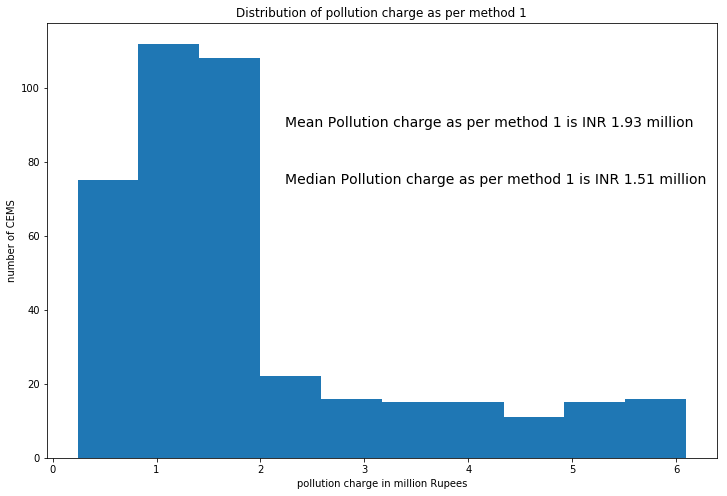

In [63]:
_ = plt.figure(figsize=(12,8))
_ = plt.hist(pollution_charge_in_millions)
_ = plt.xlabel('pollution charge in million Rupees')
_ = plt.ylabel('number of CEMS')
_ = plt.title('Distribution of pollution charge as per method 1')
_ = plt.figtext(0.4,0.7,s='Mean Pollution charge as per method 1 is INR %.2f million' 
                %pollution_charge_in_millions.mean(), fontsize = 14)
_ = plt.figtext(0.4,0.6,s='Median Pollution charge as per method 1 is INR %.2f million' 
                %pollution_charge_in_millions.median(), fontsize = 14)
plt.show()